In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('hypothyroidd.csv')

In [6]:
dataset.shape

(2582, 13)

In [7]:
dataset.head()

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,referral source
0,41,F,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC
1,70,F,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI
2,80,F,f,f,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI
3,66,F,f,f,f,f,t,0.60,2.2,123.0,0.93,132.0,SVI
4,68,M,f,f,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2582 non-null   int64  
 1   sex              2582 non-null   object 
 2   sick             2582 non-null   object 
 3   pregnant         2582 non-null   object 
 4   thyroid surgery  2582 non-null   object 
 5   goitre           2582 non-null   object 
 6   tumor            2582 non-null   object 
 7   TSH              2582 non-null   float64
 8   T3               2582 non-null   float64
 9   TT4              2582 non-null   float64
 10  T4U              2582 non-null   float64
 11  FTI              2582 non-null   float64
 12  referral source  2582 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 262.4+ KB


In [9]:
dataset.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000
mean,53.175058,5.053840,1.999938,107.791131,0.994851,109.443106
std,20.404538,24.167408,0.826463,35.454631,0.195513,32.458110
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,37.000000,0.500000,1.500000,88.000000,0.870000,93.000000
50%,55.000000,1.300000,2.000000,103.000000,0.980000,107.000000
75%,69.000000,2.600000,2.300000,124.000000,1.080000,123.000000
max,455.000000,530.000000,10.600000,430.000000,2.120000,395.000000


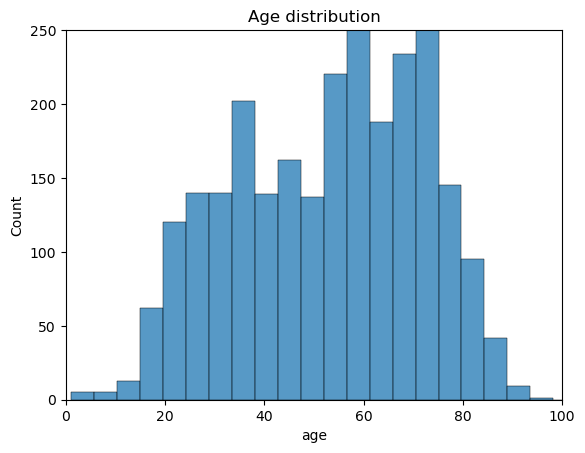

In [10]:
sns.histplot(dataset.age)
plt.title('Age distribution')
plt.xlim(0,100)
plt.ylim(0,250)
plt.show()

In [12]:
dataset['sex']=dataset['sex'].replace(['M','F'],[2,3])
dataset['sick']=dataset['sick'].replace(['f','t'],[0,1])
dataset['pregnant']=dataset['pregnant'].replace(['f','t'],[0,1])
dataset['thyroid surgery']=dataset['thyroid surgery'].replace(['f','t'],[0,1])
dataset['goitre']=dataset['goitre'].replace(['f','t'],[0,1])
dataset['tumor']=dataset['tumor'].replace(['f','t'],[0,1])
dataset['referral source']=dataset['referral source'].replace(['SVHC','SVI','STMW','other','SVHD'],[4,5,6,7,8])


In [13]:
dataset.head()

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,referral source
0,41,3,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,4
1,70,3,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,5
2,80,3,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0,5
3,66,3,0,0,0,0,1,0.60,2.2,123.0,0.93,132.0,5
4,68,2,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0,5


<Axes: title={'center': 'thyroid sickness based on the age'}, xlabel='age', ylabel='Count'>

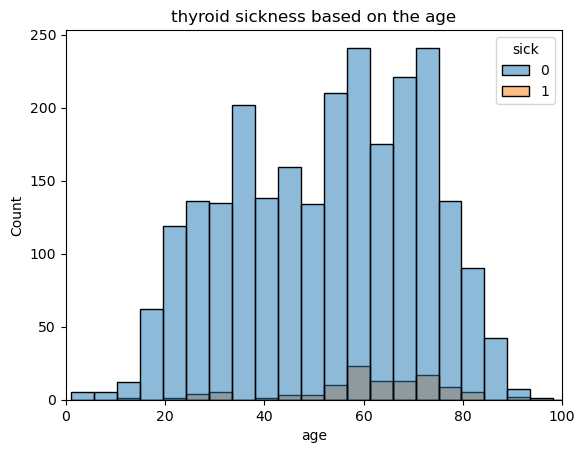

In [54]:
plt.xlim(0,100)
plt.ylim=(0, 250)
plt.title("thyroid sickness based on the age")
sns.histplot(x="age", hue="sick", data=dataset)

In [16]:
X = dataset.iloc[:, [0, 1, 4]].values
y = dataset.iloc[:, 2].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
Classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
Classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [20]:
y_pred=Classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [21]:
print(y_test)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [31]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm,'\n\n')
print('--------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('classification Report:\n')
print(result)

accuracy:0.959381


[[496   0]
 [ 21   0]] 


--------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       496
           1       0.00      0.00      0.00        21

    accuracy                           0.96       517
   macro avg       0.48      0.50      0.49       517
weighted avg       0.92      0.96      0.94       517



C:\Users\Applecenter\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Applecenter\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Applecenter\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


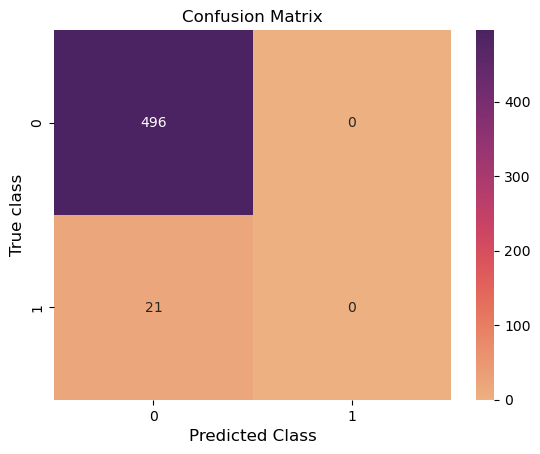

In [32]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [ ]:
#deciesion tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [67]:
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
dt_y_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
dt_report = classification_report(y_test, dt_y_pred)
print('Decision Tree Classification Report:\n', dt_report)

Decision Tree Accuracy: 0.92
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       489
           1       0.28      0.29      0.28        28

    accuracy                           0.92       517
   macro avg       0.62      0.62      0.62       517
weighted avg       0.92      0.92      0.92       517



In [71]:
!pip install graphviz

In [77]:
target_column = 'sick'
feature_columns = dataset.columns[dataset.columns != target_column]  

In [78]:
X = dataset[feature_columns]
y = dataset[target_column]

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [80]:
clf = DecisionTreeClassifier(random_state=42)

In [81]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
class_names = ['Class 0', 'Class 1'] 

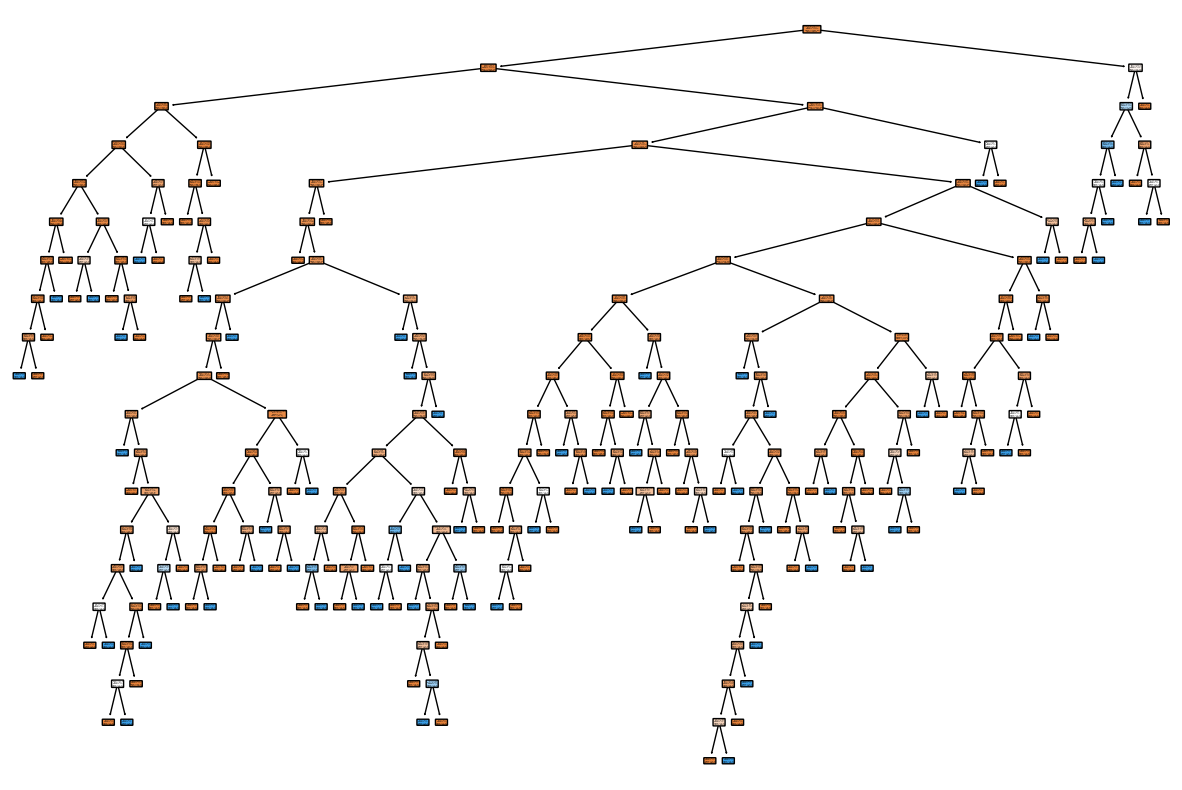

In [84]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=list(X.columns), class_names=class_names, filled=True, rounded=True)
plt.show()